In [37]:
import pandas as pd
import numpy as np
import re

In [39]:
def pandas_df_to_latex_table(df):
    res = ''
    res += '\begin{table}'
    res += '\footnotesize\n'
    table = df.to_latex(index=False)
    tabular = re.sub(r'([a-zA-Z]+)\\\\_(\S+)', '\$$1_{$2}\$', table)
    res += tabular
    res += '\normalsize\n'
    res += '''
        \caption{Caption}
        \label{tab:my_label}
        \end{table}
        '''
    return res
    
    

In [40]:
df = pd.read_csv('./DATA/SCAM2021_Data.csv')

In [41]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tool                     306 non-null    object 
 1   Warning                  306 non-null    object 
 2   Severity                 306 non-null    object 
 3   Production Hits          306 non-null    int64  
 4   Testcode Hits            306 non-null    int64  
 5   Production Hits per LoC  306 non-null    float64
 6   Testcode Hits per LoC    306 non-null    float64
 7   Weighted Ratio           306 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 19.2+ KB


In [43]:
severity_group = df.groupby(['Tool', 'Severity'])

In [44]:
tool_severity_group = severity_group[['Production Hits', 'Testcode Hits']]
tool_severity_group.sum()

Production Hits  Testcode Hits
Tool                  Severity                                
Clang Static Analyzer H                    1155            263
                      L                     671            164
                      M                     971            139
Clang Tidy            C                      89              2
                      H                     526            113
                      L                    7625           4789
                      M                    9743           3539
                      S                      92             24
CppCheck              C                     249            103
                      H                    5132           1718
                      L                    6550            733
                      M                    3938           2213
                      S                   24939           5422

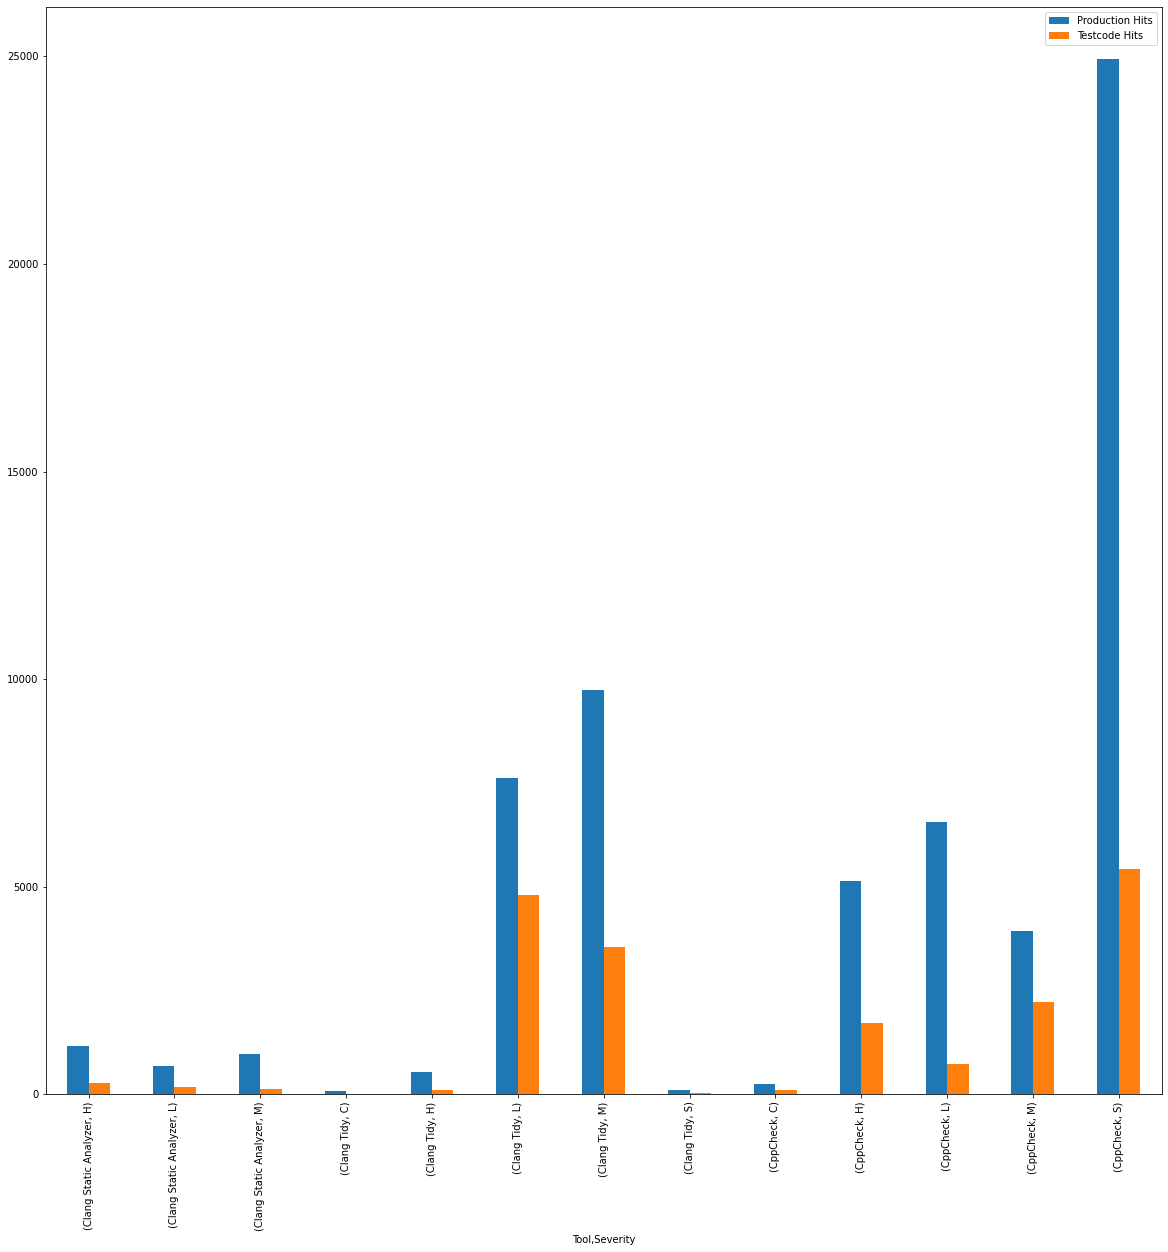

In [45]:
plot = tool_severity_group.sum().plot.bar(stacked=False,subplots=False, figsize=(20,20))

In [46]:
df = pd.read_csv('./DATA/SCAM2021_Data.csv')
df.replace('ONLY PRODUCTION', np.nan, inplace=True)

In [47]:
df = df.dropna()
df['Weighted Ratio'] = df['Weighted Ratio'].astype(float)
df.rename(columns={'Production Hits': 'Hits_P', 'Testcode Hits': 'Hits_T', 'Weighted Ratio': 'Ratio'}, inplace=True)
df

,Tool,Warning,Severity,Hits_P,Hits_T,Production Hits per LoC,Testcode Hits per LoC,Ratio
0,Clang Tidy,clang-diagnostic-error,C,89,2,5.030373e-06,6.017081e-07,8.360156
2,Clang Tidy,bugprone-incorrect-roundings,H,217,9,1.226507e-05,2.707686e-06,4.529722
3,Clang Tidy,bugprone-misplaced-widening-cast,H,48,29,2.713010e-06,8.724767e-06,0.310955
5,Clang Tidy,bugprone-sizeof-expression,H,187,8,1.056944e-05,2.406832e-06,4.391430
6,Clang Tidy,bugprone-string-constructor,H,3,1,1.695631e-07,3.008540e-07,0.563606
...,...,...,...,...,...,...,...,...
292,CppCheck,unusedStructMember,S,178,3,1.006075e-05,9.025621e-07,11.146875
293,CppCheck,unusedVariable,S,49,4,2.769531e-06,1.203416e-06,2.301391
294,CppCheck,useInitializationList,L,270,256,1.526068e-05,7.701863e-05,0.198143
295,CppCheck,useStlAlgorithm,S,205,26,1.158681e-05,7.822205e-06,1.481272


In [48]:
df.sort_values(by=['Ratio'], ascending=[False], inplace=True)
df

,Tool,Warning,Severity,Hits_P,Hits_T,Production Hits per LoC,Testcode Hits per LoC,Ratio
55,Clang Tidy,clang-diagnostic-deprecated-copy-with-user-pro...,M,1221,1,0.000069,3.008540e-07,229.387649
54,Clang Tidy,clang-diagnostic-deprecated-copy,M,725,2,0.000041,6.017081e-07,68.102394
277,CppCheck,uninitMemberVarPrivate,M,122,1,0.000007,3.008540e-07,22.919978
119,Clang Tidy,misc-misplaced-const,L,96,1,0.000005,3.008540e-07,18.035393
41,Clang Tidy,bugprone-undefined-memory-manipulation,M,191,2,0.000011,6.017081e-07,17.941458
...,...,...,...,...,...,...,...,...
96,Clang Tidy,clang-diagnostic-void-pointer-to-enum-cast,M,0,4,0.000000,1.203416e-06,0.000000
46,Clang Tidy,cert-oop58-cpp,M,0,1,0.000000,3.008540e-07,0.000000
204,CppCheck,mismatchAllocDealloc,H,0,2,0.000000,6.017081e-07,0.000000
60,Clang Tidy,clang-diagnostic-implicitly-unsigned-literal,M,0,2,0.000000,6.017081e-07,0.000000


In [49]:
toolgroup = df.groupby('Tool')

In [50]:
remove_less_than_x_hits = 5

In [51]:
remove_factors_under_x = 3.0

In [52]:
filter_low_hitnums = (((df['Hits_T'] >= remove_less_than_x_hits) & (df['Ratio'] >= remove_factors_under_x) | (df['Ratio'] <= 1.0/remove_factors_under_x))
                )

In [53]:
it = toolgroup[['Warning', 'Severity', 'Hits_P', 'Hits_T','Ratio']]

In [54]:
tidy_hits = it.get_group('Clang Tidy').sort_values(by=['Ratio'], ascending=[False])

In [55]:
tidy_hits_filtered_lows = tidy_hits[filter_low_hitnums]
tidy_hits_filtered_lows
tidy_hits_filtered_lows.to_latex(index=False)

<ipython-input-55-f2d03152444e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tidy_hits_filtered_lows = tidy_hits[filter_low_hitnums]


'\\begin{tabular}{llrrr}\n\\toprule\n                                       Warning & Severity &  Hits\\_P &  Hits\\_T &    Ratio \\\\\n\\midrule\n                  bugprone-incorrect-roundings &        H &     217 &       9 & 4.529722 \\\\\n                    bugprone-sizeof-expression &        H &     187 &       8 & 4.391430 \\\\\n           misc-unconventional-assign-operator &        M &     321 &      18 & 3.350325 \\\\\n                   bugprone-signed-char-misuse &        M &     264 &      15 & 3.306489 \\\\\n     bugprone-string-literal-with-embedded-nul &        M &       7 &       4 & 0.328770 \\\\\n              bugprone-misplaced-widening-cast &        H &      48 &      29 & 0.310955 \\\\\n                   misc-definitions-in-headers &        M &    1580 &     966 & 0.307280 \\\\\n                 performance-no-automatic-move &        L &      16 &      10 & 0.300590 \\\\\n    cppcoreguidelines-special-member-functions &        L &    7457 &    4778 & 0.293206 \\\\

In [56]:
pandas_df_to_latex_table(tidy_hits_filtered_lows)

'\x08egin{table}\x0cootnotesize\n\\begin{tabular}{llrrr}\n\\toprule\n                                       Warning & Severity &  Hits\\_P &  Hits\\_T &    Ratio \\\\\n\\midrule\n                  bugprone-incorrect-roundings &        H &     217 &       9 & 4.529722 \\\\\n                    bugprone-sizeof-expression &        H &     187 &       8 & 4.391430 \\\\\n           misc-unconventional-assign-operator &        M &     321 &      18 & 3.350325 \\\\\n                   bugprone-signed-char-misuse &        M &     264 &      15 & 3.306489 \\\\\n     bugprone-string-literal-with-embedded-nul &        M &       7 &       4 & 0.328770 \\\\\n              bugprone-misplaced-widening-cast &        H &      48 &      29 & 0.310955 \\\\\n                   misc-definitions-in-headers &        M &    1580 &     966 & 0.307280 \\\\\n                 performance-no-automatic-move &        L &      16 &      10 & 0.300590 \\\\\n    cppcoreguidelines-special-member-functions &        L &  

In [18]:
with open(f'DATA/Clang_Tidy_Less_Than_{remove_less_than_x_hits}_removed.txt', 'w') as tidy_file:    
    tidy_file.write(pandas_df_to_latex_table(tidy_hits_filtered_lows))

In [19]:
sa_hits = it.get_group('Clang Static Analyzer').sort_values(by=['Ratio'], ascending=[False])

In [20]:
sa_hits_filtered_lows = sa_hits[filter_low_hitnums]
sa_hits_filtered_lows

<ipython-input-20-9debf37a72b0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sa_hits_filtered_lows = sa_hits[filter_low_hitnums]


,Warning,Severity,Hits_P,Hits_T,Ratio
17,core.NullDereference,H,222,5,8.341369
103,optin.cplusplus.VirtualCall,M,259,9,5.406443
102,optin.cplusplus.UninitializedObject,M,175,7,4.696717
19,core.UndefinedBinaryOperatorResult,H,182,9,3.799122
21,core.uninitialized.Assign,H,125,96,0.244621
109,unix.Malloc,M,59,49,0.226209
25,cplusplus.Move,H,12,29,0.077739
24,cplusplus.InnerPointer,H,0,1,0.000000
105,performance-inefficient-algorithm,M,0,2,0.000000


In [21]:
with open(f'DATA/Clang_SA_Less_Than_{remove_less_than_x_hits}_removed.txt', 'w') as tidy_file:
    tidy_file.write(sa_hits_filtered_lows.to_latex(index=False))

In [22]:
cppcheck_hits = it.get_group('CppCheck').sort_values(by=['Ratio'], ascending=[False])
cppcheck_hits_filtered_lows = cppcheck_hits[filter_low_hitnums]

<ipython-input-22-0098b4ee2791>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cppcheck_hits_filtered_lows = cppcheck_hits[filter_low_hitnums]


In [31]:
cppcheck_hits_filtered_lows.filter(items=['Warning', 'Severity', 'Hits_P', 'Hits_T'])

,Warning,Severity,Hits_P,Hits_T
155,cstyleCast,S,1676,24
174,funcArgNamesDifferent,S,5771,93
176,functionConst,S,2736,69
301,variableScope,S,2802,86
148,constParameter,L,247,8
276,uninitMemberVar,M,1890,62
229,passedByValue,L,584,22
215,noOperatorEq,M,156,6
213,noCopyConstructor,M,154,6
268,stlcstrParam,L,106,5


In [24]:
with open(f'DATA/CppCheck_Less_Than_{remove_less_than_x_hits}_removed.txt', 'w') as tidy_file:
    tidy_file.write(cppcheck_hits_filtered_lows.to_latex(index=False))

<AxesSubplot:>

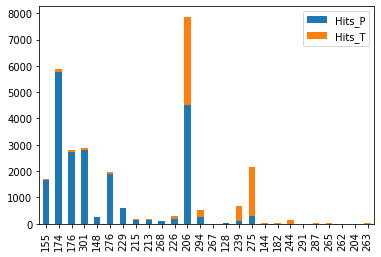

In [25]:
cppcheck_hits_filtered_lows[['Hits_P', 'Hits_T']].plot.bar(subplots=False, stacked=True)